<h2 style="color:orange">9.1 A Brief matplotlib API Primer</h2>

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
data = np.arange(10)

In [3]:
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

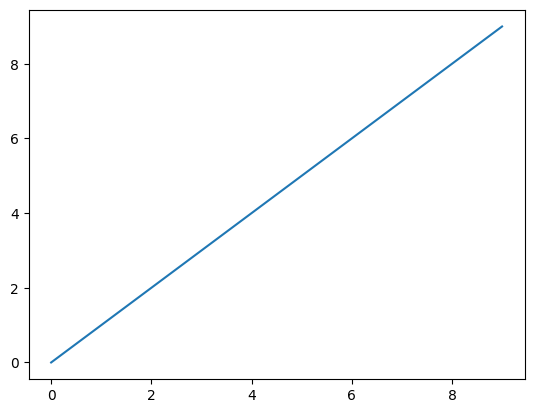

In [4]:
plt.plot(data)

<h3 style="color:purple">Figures and Subplots</h3>

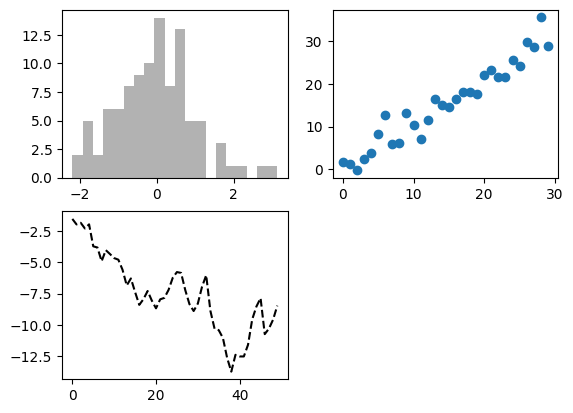

In [5]:
fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1)

ax2 = fig.add_subplot(2, 2, 2)

ax3 = fig.add_subplot(2, 2, 3)

ax1.hist(np.random.standard_normal(100), bins=20, color="black", alpha=0.3);
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.standard_normal(30));
ax3.plot(np.random.standard_normal(50).cumsum(), color="black", linestyle="dashed");


array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

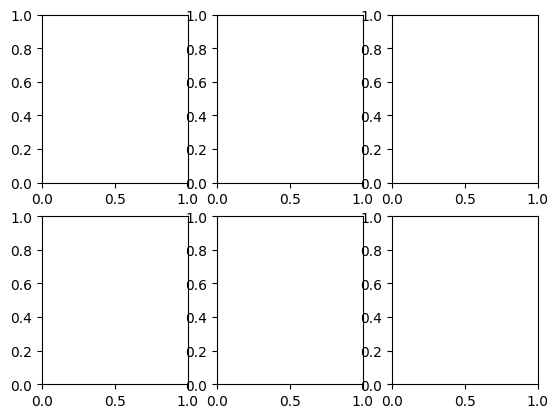

In [6]:
fig, axes = plt.subplots(2, 3)

axes

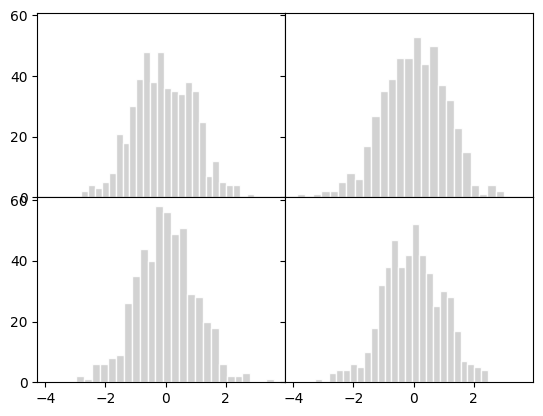

In [7]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.standard_normal(500), bins=25, color="#CECECE", edgecolor="white", alpha=0.9, mouseover=True)
fig.subplots_adjust(wspace=0, hspace=0)

<h3 style="color:purple">Colors, Markers, and Line Styles</h3>

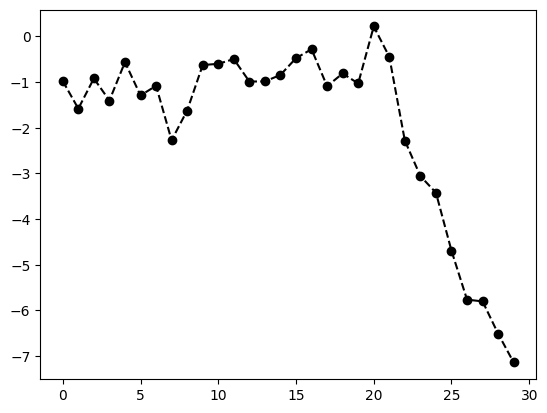

In [8]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(np.random.standard_normal(30).cumsum(), color="black", linestyle="dashed", marker="o");


(-1.4500000000000002, 30.45)

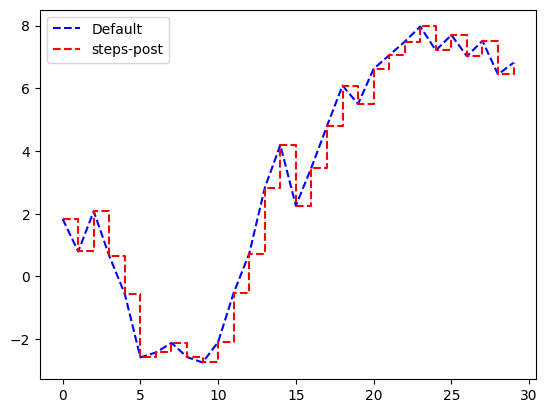

In [9]:
fig = plt.figure()
ax = fig.add_subplot()
data = np.random.standard_normal(30).cumsum()
ax.plot(data, color="blue", linestyle="dashed", label="Default");
ax.plot(data, color="red", linestyle="dashed", drawstyle="steps-post", label="steps-post");
ax.legend()
ax.get_xlim()

<h3 style="color:purple">Ticks, Labels, and Legends
</h3>

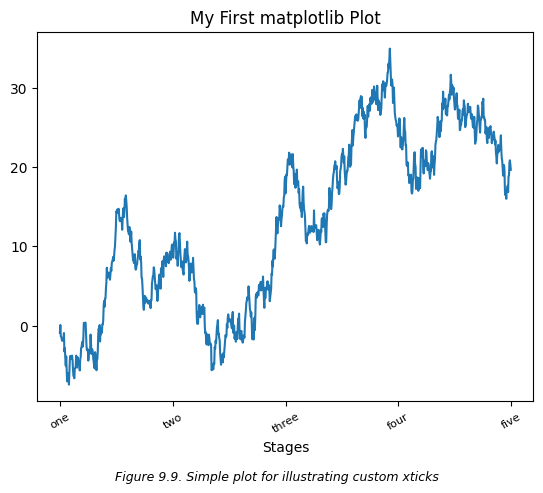

In [10]:
fig, ax = plt.subplots()
ticks = ax.set_xticks([250 * x for x in range(5)])
labels = ax.set_xticklabels(["one", "two", "three", "four", "five"], rotation=30, fontsize=8)
ax.set_xlabel("Stages")
ax.set_title("My First matplotlib Plot")
ax.plot(np.random.standard_normal(1000).cumsum());
plt.figtext(.5, -0.06, s="Figure 9.9. Simple plot for illustrating custom xticks", va="bottom", ha="center", fontsize=9, style="italic");

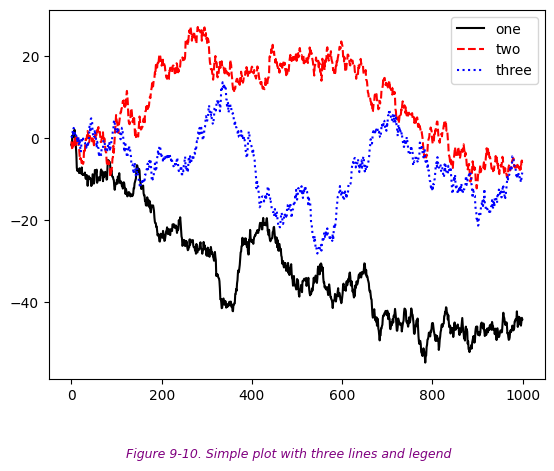

In [11]:
fig, ax = plt.subplots()
ax.plot(np.random.randn(1000).cumsum(), color="black", label="one");
ax.plot(np.random.randn(1000).cumsum(), color="red", linestyle="dashed", label="two");
ax.plot(np.random.randn(1000).cumsum(), color="blue", linestyle="dotted", label="three");
ax.legend();
plt.figtext(.5, -0.06, s="Figure 9-10. Simple plot with three lines and legend", va="bottom", ha="center", fontsize=9, style="italic", color="purple");

<h3 style="color:purple">Annotations and Drawing on a Subplot</h3>

In [12]:
from datetime import datetime as dt

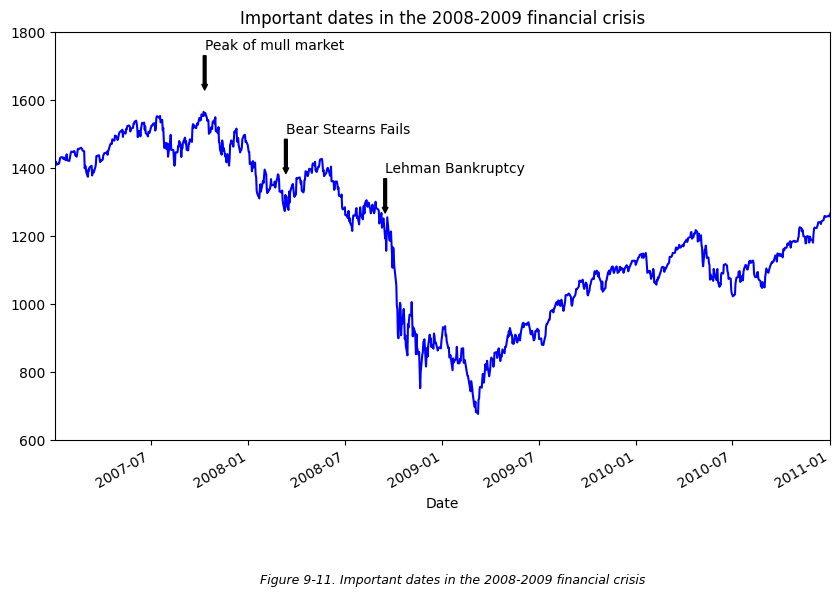

In [13]:
fig, ax = plt.subplots(figsize=(10,6));
data = pd.read_csv("../examples/spx.csv", index_col=0, parse_dates=True)
spx = data["SPX"]
spx.plot(ax=ax, color="blue");

crisis_data = [
    (dt(2007, 10, 11), "Peak of mull market"),
    (dt(2008, 3, 12), "Bear Stearns Fails"),
    (dt(2008, 9, 15), "Lehman Bankruptcy")
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75), 
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor="black", headwidth=4, width=2, headlength=4),
                horizontalalignment="left",
                verticalalignment="top")
# Zoom in in 2007-2010
ax.set_xlim(["1/2/2007","1/1/2011"])
ax.set_ylim([600, 1800])

ax.set_title("Important dates in the 2008-2009 financial crisis");
plt.figtext(0.33, -0.04, "Figure 9-11. Important dates in the 2008-2009 financial crisis", style="italic", fontsize=9);

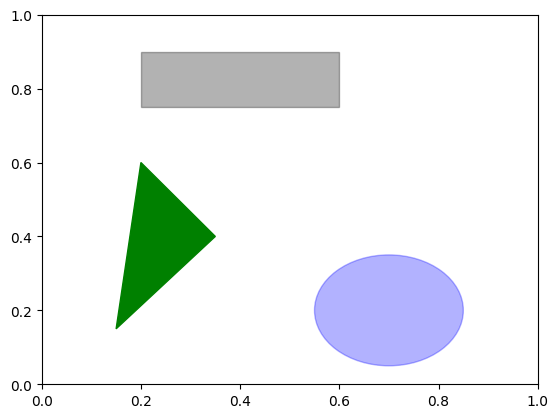

In [5]:
fig, ax = plt.subplots()

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color="black", alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color="blue", alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color="green")

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

fig.savefig("figpath.png", dpi=400)

<h3 style="color:purple">matplotlib Configuration</h3>

In [12]:
plt.rc("figure", figsize=(10, 10))
plt.rc("font", family="monospace", weight="bold", size=8)

<h2 style="color:orange">9.2 Plotting with pandas and seaborn</h2>

<h3 style="color:purple">Line Plots</h3>

In [73]:
s = pd.Series(np.random.standard_normal(10).cumsum(), index=np.arange(0, 100, 10));

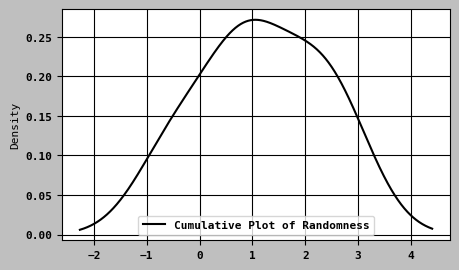

In [74]:
s.plot(figsize=(5,3), label="Cumulative Plot of Randomness", legend=True, kind="density", grid=True );


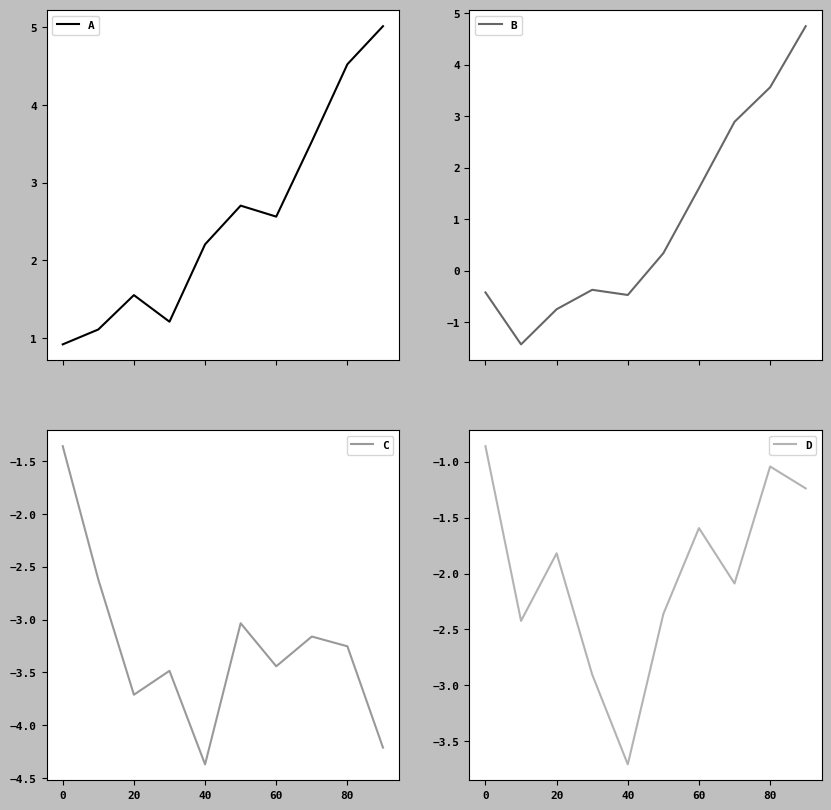

In [75]:
df = pd.DataFrame(np.random.standard_normal((10, 4)).cumsum(0), columns=["A", "B", "C", "D"], index=np.arange(0, 100, 10));
plt.style.use('grayscale');
df.plot(subplots=True, layout=(2,2));

<h3 style="color:purple">Bar Plots</h3>

<Axes: >

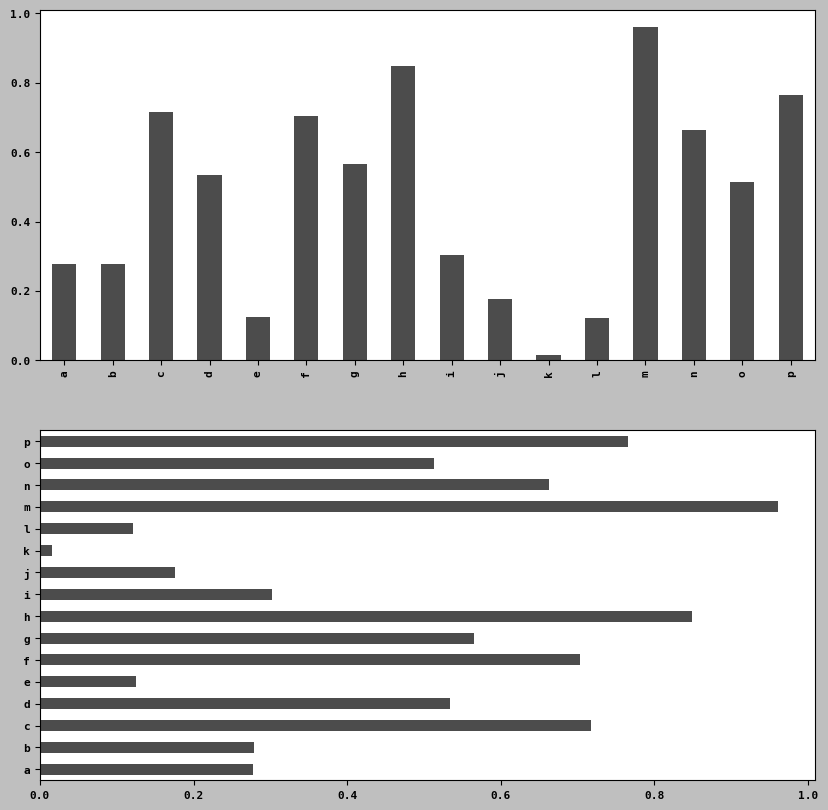

In [82]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.uniform(size=16), index=list("abcdefghijklmnop"))
data.plot.bar(ax=axes[0], color="black", alpha=0.7)
data.plot.barh(ax=axes[1], color="black", alpha=0.7)

In [87]:
df = pd.DataFrame(np.random.uniform(size=(6, 4)),
                 index=["one", "two", "three", "four", "five", "six"],
                 columns=pd.Index(["A", "B", "C", "D"], name="Genus"))
df

Genus,A,B,C,D
one,0.028911,0.291466,0.802115,0.822878
two,0.123924,0.567147,0.890290,0.385640
three,0.094135,0.288021,0.675155,0.901198
four,0.580959,0.613227,0.805212,0.324400
five,0.312546,0.837728,0.675058,0.335548
six,0.385923,0.533786,0.960969,0.877895


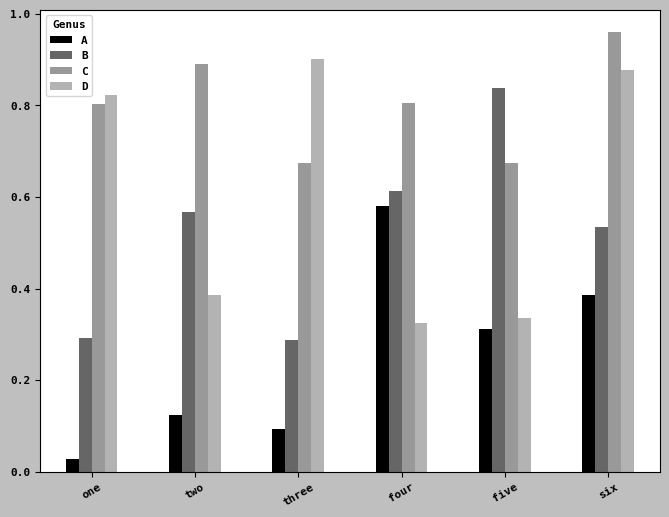

In [93]:
df.plot.bar(figsize=(8,6), rot=30);

<Axes: >

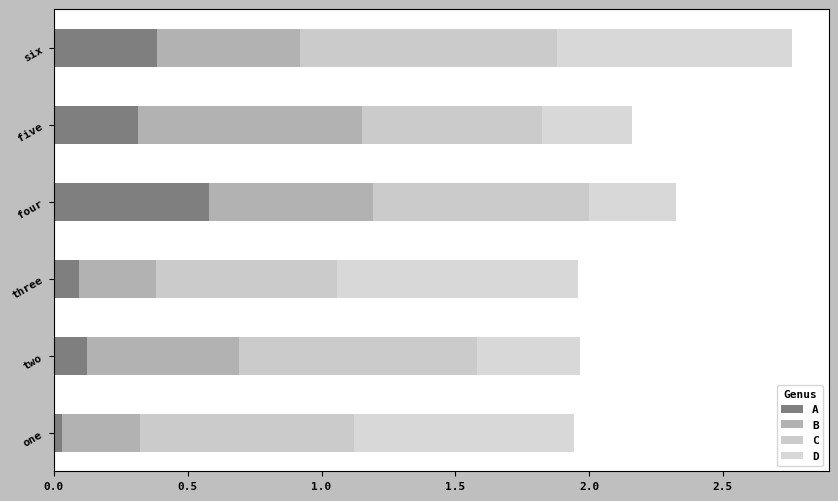

In [97]:
df.plot.barh(figsize=(10,6), stacked=True, rot=30, alpha=0.5)

In [104]:
tips = pd.read_csv("../examples/tips.csv")
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [108]:
party_counts = pd.crosstab(tips["day"], tips["size"]).reindex(index=["Thur", "Fri", "Sat", "Sun"])

In [109]:
party_counts

size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1


In [111]:
party_counts = party_counts.loc[:, 2:5]

In [114]:
party_pcts = party_counts.div(party_counts.sum(axis="columns"), axis="index")

In [115]:
party_pcts

size,2,3,4,5
day,,,,
Thur,0.827586,0.068966,0.086207,0.017241
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000


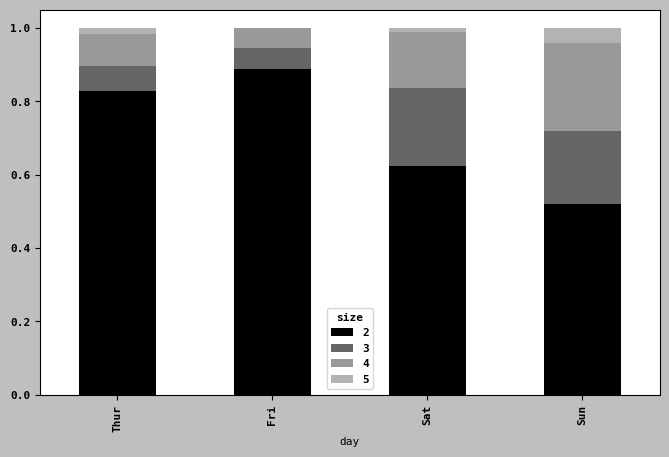

In [120]:
party_pcts.plot.bar(stacked=True, figsize=(8,5));